# Decide on QC Metrics and Thresholds

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [146]:
df = pd.read_csv('../data/datasets_all_regions/origin_2010_2015_reloc_cog_morton_ver3.csv',index_col=0)
df


,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist
0,47.22533,-122.16895,56.111,1.262305e+09,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481
1,48.19518,-121.77276,3.820,1.262305e+09,1,55,25,30,0.985,30.0,201.698107,genie,0,1.333054,4.933712e+07,411142.646872
2,47.86208,-122.09903,17.799,1.262330e+09,2,28,10,18,0.784,18.0,181.023074,genie,0,0.957326,4.931184e+07,410932.027590
3,47.96435,-122.91906,21.286,1.262336e+09,3,20,10,10,0.465,10.0,150.528010,genie,0,0.684951,4.930621e+07,410885.088574
4,45.87262,-122.19180,9.822,1.262362e+09,4,39,20,19,0.657,19.0,237.324295,genie,0,1.627692,4.927976e+07,410664.693011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,40.59439,-124.42438,19.741,1.435097e+09,63882,23,9,14,1.015,14.0,73.959960,genie,4408,0.112501,7.919735e+03,65.997794
63883,40.54636,-127.10076,26.165,1.435100e+09,63883,12,1,11,0.744,11.0,223.080984,genie,4408,2.139193,9.995899e+03,83.299204
63884,49.74167,-124.58578,5.274,1.435101e+09,63884,13,7,6,0.894,6.0,197.904075,genie,4408,9.188393,1.107364e+04,92.281049
63885,40.64363,-125.36531,1.891,1.435101e+09,63885,8,3,5,0.982,5.0,145.748415,genie,4408,0.824720,1.158579e+04,96.548245


## Histogram of picks for all events

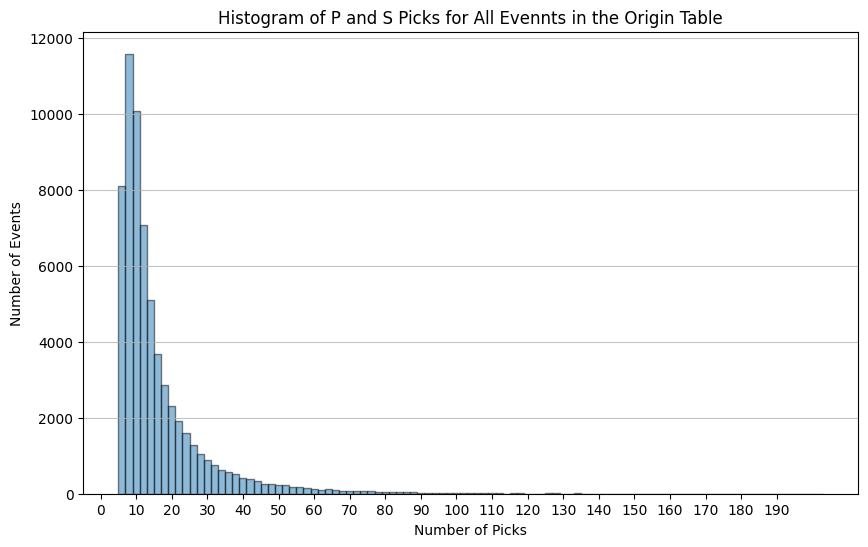

In [147]:
bins = np.linspace(df['nass'].min(), df['nass'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['nass'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of P and S Picks for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 200, 10))
plt.grid(axis='y', alpha=0.75)

## Histogram of P picks for all events

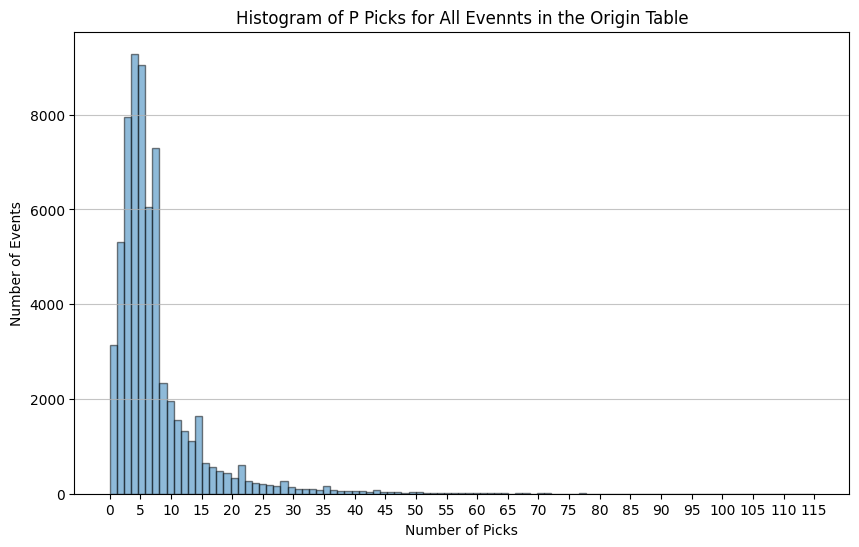

In [148]:
bins = np.linspace(df['p_picks'].min(), df['p_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['p_picks'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of P Picks for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 120, 5))

plt.grid(axis='y', alpha=0.75)

## Histogram of S picks for all events

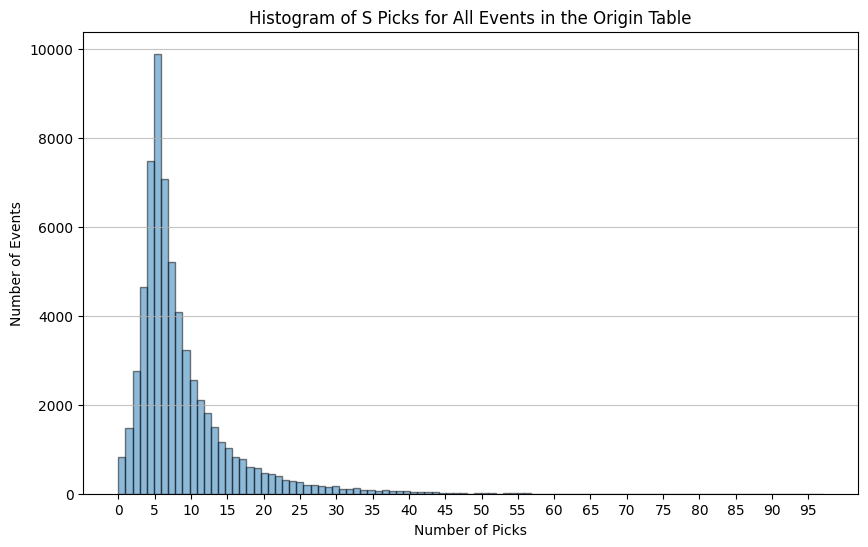

In [149]:
bins = np.linspace(df['s_picks'].min(), df['s_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['s_picks'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of S Picks for All Events in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 100, 5))
plt.grid(axis='y', alpha=0.75)

### Histograms of P and S picks combined

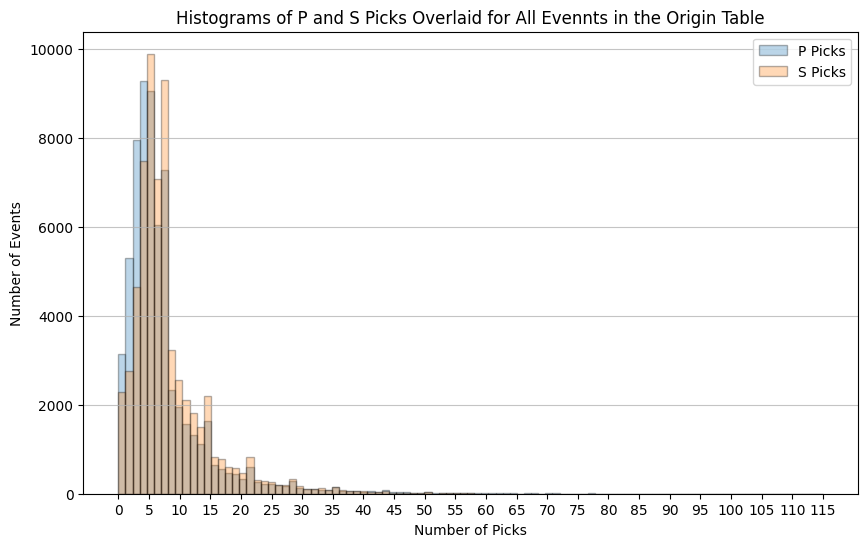

In [150]:
bins = np.linspace(df['p_picks'].min(), df['p_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['p_picks'],bins=bins, alpha=0.3, edgecolor='black', label='P Picks')
plt.hist(df['s_picks'], bins=bins, alpha=0.3, edgecolor='black', label='S Picks')

plt.title('Histograms of P and S Picks Overlaid for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 120, 5))
plt.legend()
plt.grid(axis='y', alpha=0.75)

## Histogram of RMS for all events

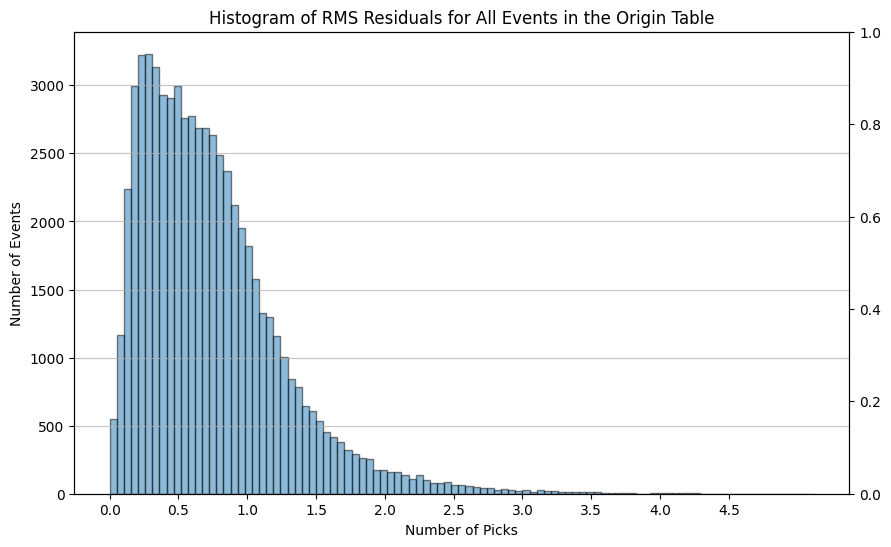

In [151]:
bins = np.linspace(df['rms'].min(), df['rms'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(df['rms'],bins=bins, alpha=0.5, edgecolor='black')
ax.set_title('Histogram of RMS Residuals for All Events in the Origin Table')
ax.set_xlabel('Number of Picks')
ax.set_ylabel('Number of Events')
ax.set_xticks(np.arange(0, 5, 0.5))
ax.grid(axis='y', alpha=0.75)

In [152]:
ax.set_xlabel('Gap (°)')

Text(0.5, 24.0, 'Gap (°)')

## Histogram of Gap for all events

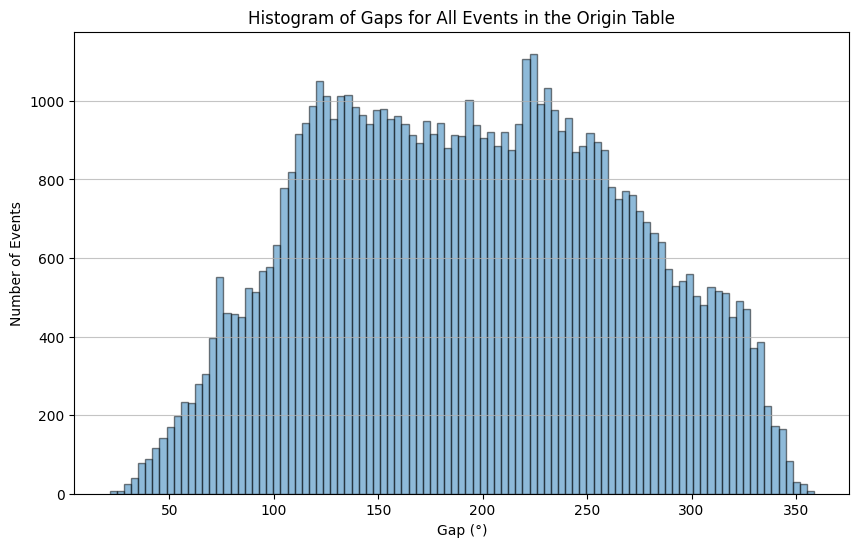

In [153]:
bins = np.linspace(df['gap'].min(), df['gap'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()

ax.hist(df['gap'],bins=bins, alpha=0.5, edgecolor='black')
ax.set_title('Histogram of Gaps for All Events in the Origin Table')
ax.set_xlabel('Gap (°)')
ax.set_ylabel('Number of Events')
ax.grid(axis='y', alpha=0.75)

### Histogram of Non-Dimensional Distance
The non-dimensional distance is defined as:

$$
\text{NonDimDist} = \sqrt{\left(\frac{\Delta t}{120}\right)^2 + \left(\frac{\Delta x}{25}\right)^2}
$$

#### Histogram of Non-Dimensional Distance for all events

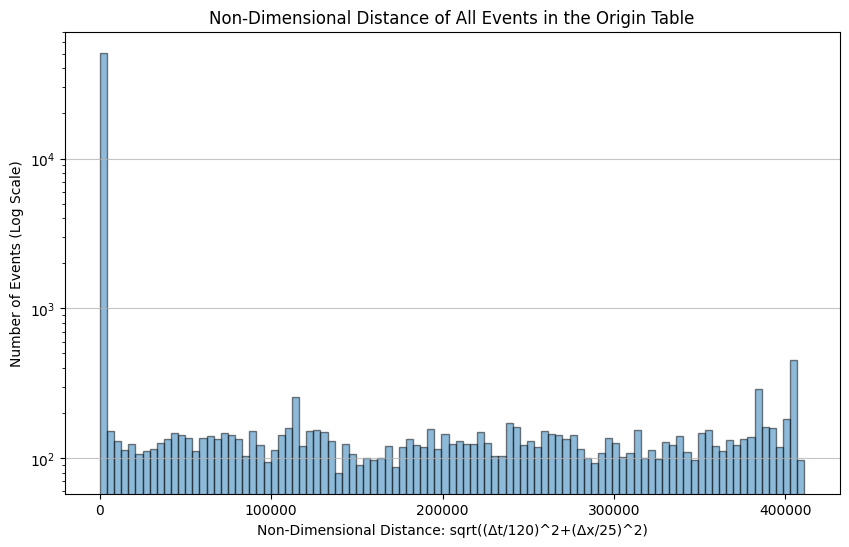

In [174]:
bins = np.linspace(df['NonDimDist'].min(), df['NonDimDist'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()

ax.hist(df['NonDimDist'],bins=bins, alpha=0.5, edgecolor='black')
ax.set_yscale('log')
ax.set_title('Non-Dimensional Distance of All Events in the Origin Table')
ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
ax.set_ylabel('Number of Events (Log Scale)')
ax.grid(axis='y', alpha=0.75)

#### Histogram of Non-Dimensional Distance with NonDimDist < 0.1

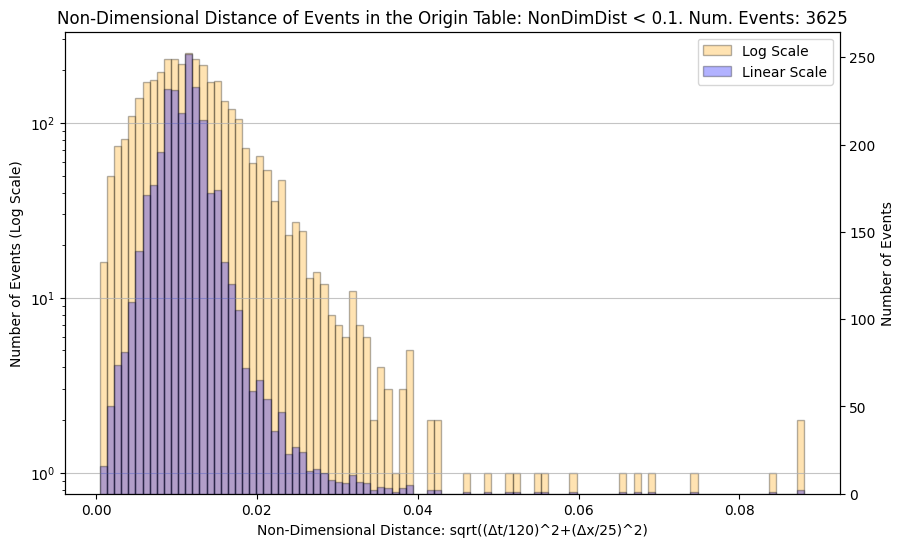

In [155]:
thd_non_dim_dist = 0.1
df_filter1 = df[df['NonDimDist'] < thd_non_dim_dist]
bins = np.linspace(df_filter1['NonDimDist'].min(), df_filter1['NonDimDist'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax2.hist(df_filter1['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='blue',label="Linear Scale")
ax2.set_ylabel('Number of Events')

ax.hist(df_filter1['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='orange',label="Log Scale")
ax.set_yscale('log')
ax.set_title(f'Non-Dimensional Distance of Events in the Origin Table: NonDimDist < {thd_non_dim_dist}. Num. Events: {len(df_filter1)}')
ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
ax.set_ylabel('Number of Events (Log Scale)')
ax.grid(axis='y', alpha=0.75)

# Get handles and labels from both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine them
handles = handles1 + handles2
labels = labels1 + labels2

# Add the combined legend to one of the axes
ax.legend(handles, labels, loc='upper right')




#### Histogram of Non-Dimensional Distance with NonDimDist < 0.2

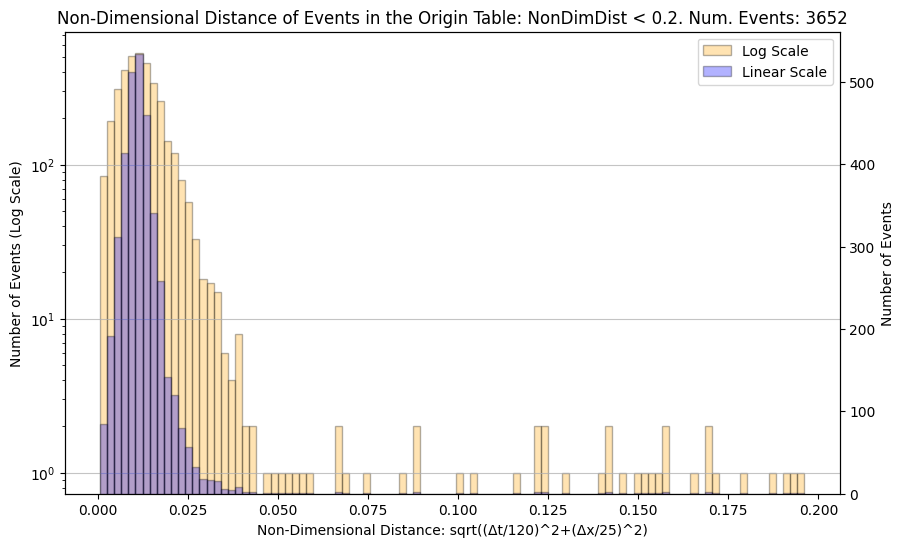

In [156]:
thd_non_dim_dist = 0.2
df_filter3 = df[df['NonDimDist'] < thd_non_dim_dist]
bins = np.linspace(df_filter3['NonDimDist'].min(), df_filter3['NonDimDist'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax2.hist(df_filter3['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='blue',label="Linear Scale")
ax2.set_ylabel('Number of Events')

ax.hist(df_filter3['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='orange',label="Log Scale")
ax.set_yscale('log')
ax.set_title(f'Non-Dimensional Distance of Events in the Origin Table: NonDimDist < {thd_non_dim_dist}. Num. Events: {len(df_filter3)}')
ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
ax.set_ylabel('Number of Events (Log Scale)')
ax.grid(axis='y', alpha=0.75)

# Get handles and labels from both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine them
handles = handles1 + handles2
labels = labels1 + labels2

# Add the combined legend to one of the axes
ax.legend(handles, labels, loc='upper right')




#### Histogram of Non-Dimensional Distance with NonDimDist < sqrt(2)

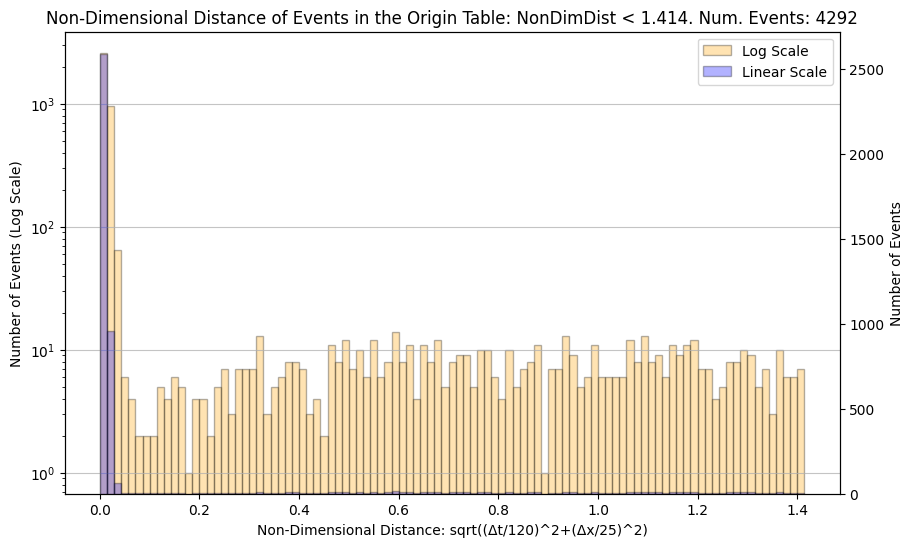

In [157]:
thd_non_dim_dist = np.sqrt(2)
df_filter2 = df[df['NonDimDist'] < thd_non_dim_dist]
bins = np.linspace(df_filter2['NonDimDist'].min(), df_filter2['NonDimDist'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax2.hist(df_filter2['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='blue',label="Linear Scale")
ax2.set_ylabel('Number of Events')

ax.hist(df_filter2['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='orange',label="Log Scale")
ax.set_yscale('log')
ax.set_title(f'Non-Dimensional Distance of Events in the Origin Table: NonDimDist < {round(thd_non_dim_dist,3)}. Num. Events: {len(df_filter2)}')
ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
ax.set_ylabel('Number of Events (Log Scale)')
ax.grid(axis='y', alpha=0.75)

# Get handles and labels from both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine them
handles = handles1 + handles2
labels = labels1 + labels2

# Add the combined legend to one of the axes
ax.legend(handles, labels, loc='upper right')




### Filter by RMS

#### P and S Picks > 4 and RMS < 1

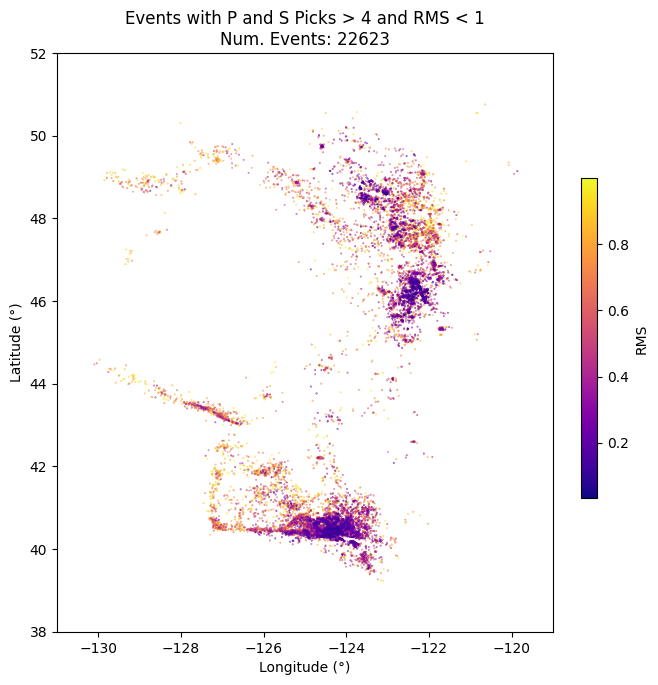

In [158]:
plt.figure(figsize=(8, 8))

# Filter and sort the data
_df = df[(df.rms<1) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=False)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and RMS < 1\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and RMS < 1.5

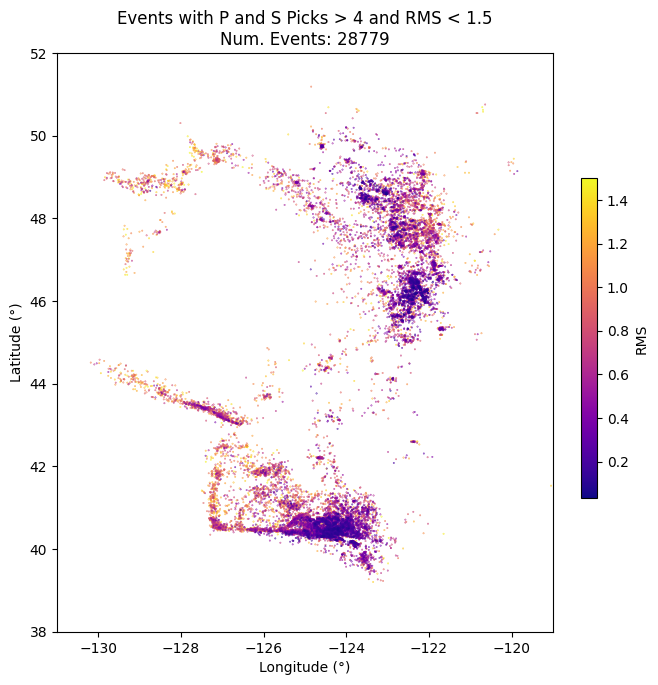

In [159]:
plt.figure(figsize=(8, 8))

# Filter and sort the data
_df = df[(df.rms<1.5) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=False)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and RMS < 1.5\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and RMS < 2.0

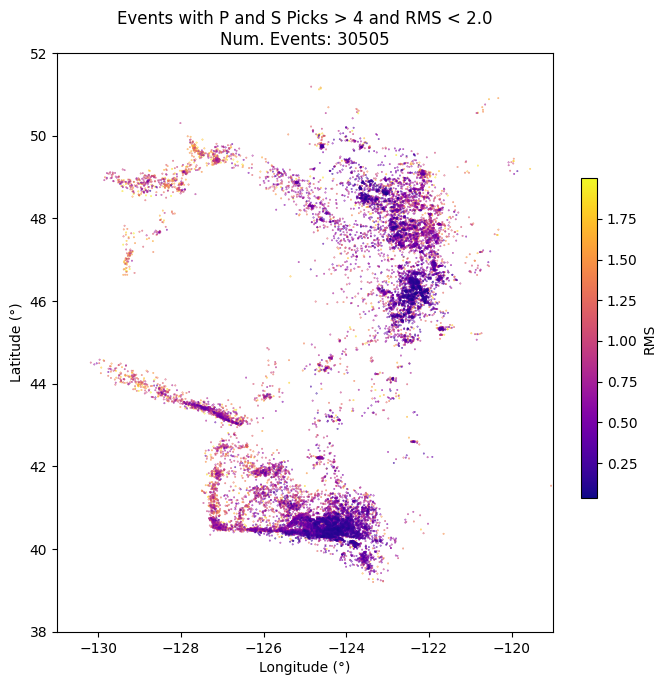

In [160]:
plt.figure(figsize=(8, 8))

# Filter and sort the data
_df = df[(df.rms<2) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=False)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and RMS < 2.0\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and RMS < 2.5

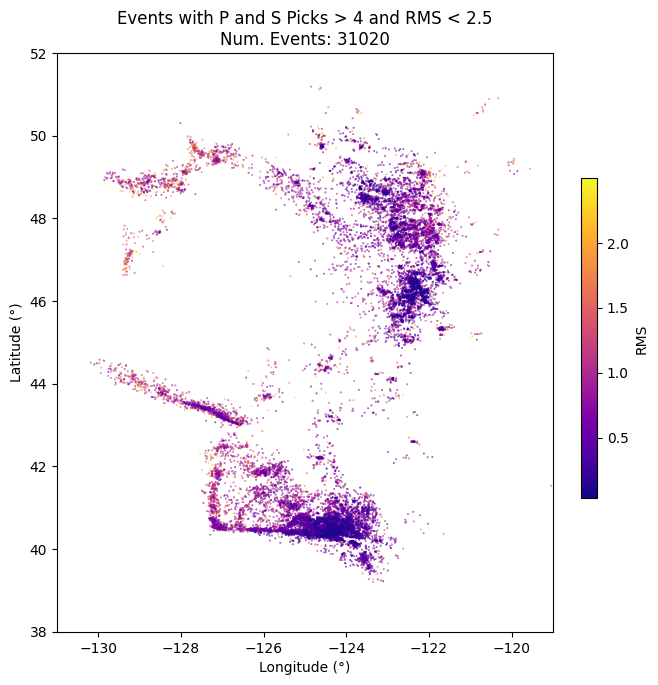

In [161]:
plt.figure(figsize=(8, 8))

# Filter and sort the data
_df = df[(df.rms<2.5) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=False)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and RMS < 2.5\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and RMS < 5

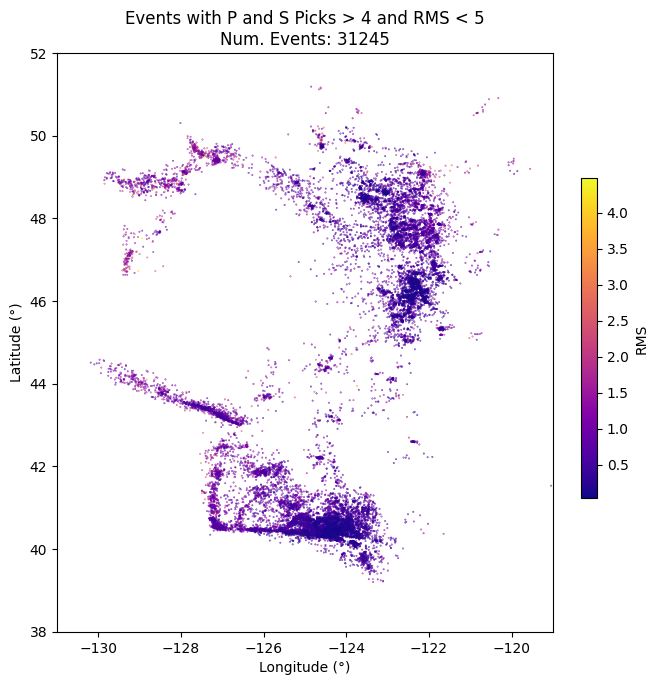

In [162]:
plt.figure(figsize=(8, 8))

# Filter and sort the data
_df = df[(df.rms<5) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=False)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and RMS < 5\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

### Filter by gap

#### P and S Picks > 4 and Gap=180+/-10 (°)

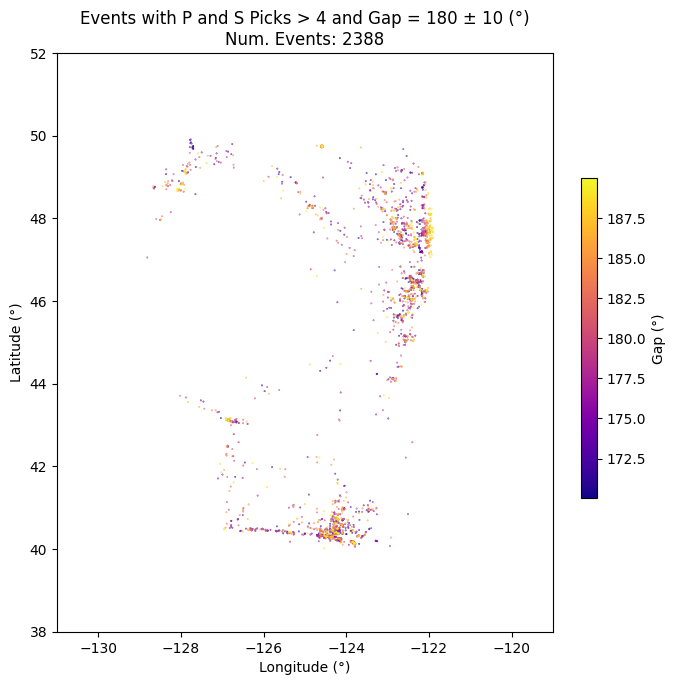

In [163]:
plt.figure(figsize=(8, 8))
tol_deg = 10
# Filter and sort the data
_df = df[(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('gap', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['gap'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Gap (°)')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and Gap=180+/-15 (°)

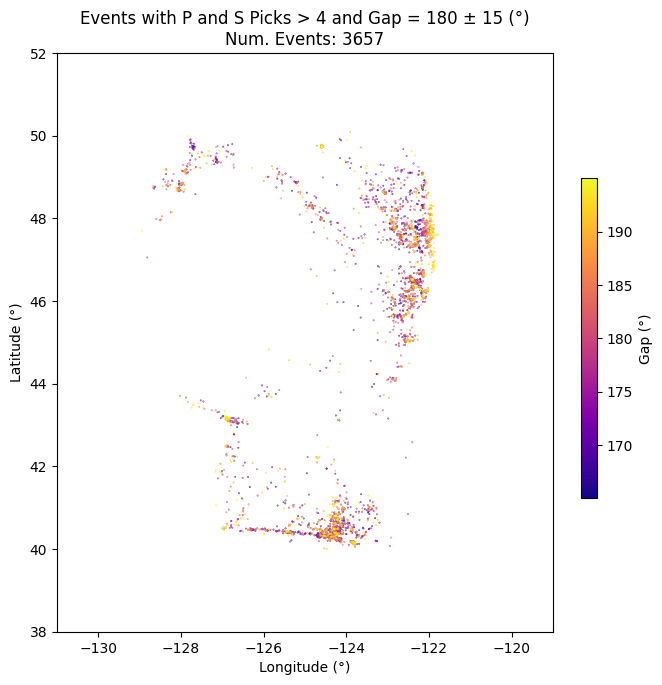

In [164]:
plt.figure(figsize=(8, 8))
tol_deg = 15
# Filter and sort the data
_df = df[(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('gap', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['gap'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Gap (°)')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and Gap=180+/-20 (°)

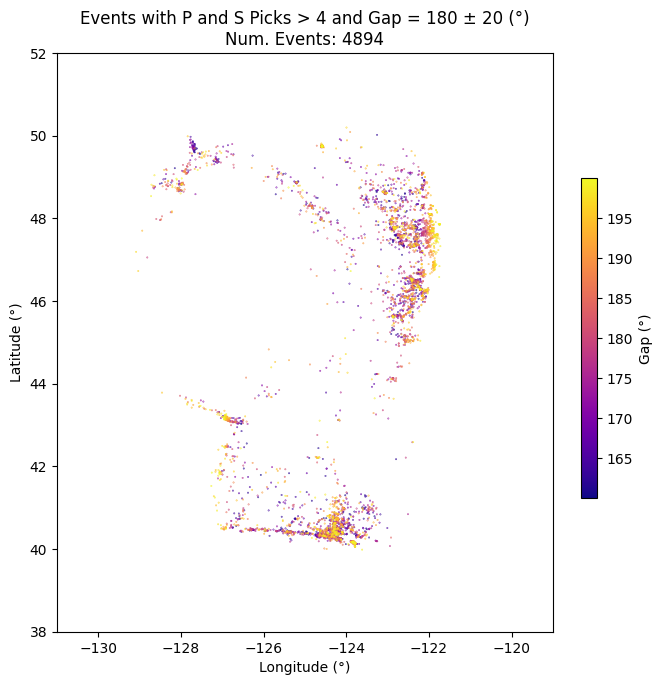

In [165]:
plt.figure(figsize=(8, 8))
tol_deg = 20
# Filter and sort the data
_df = df[(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('gap', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['gap'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Gap (°)')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and Gap=180+/-25 (°)

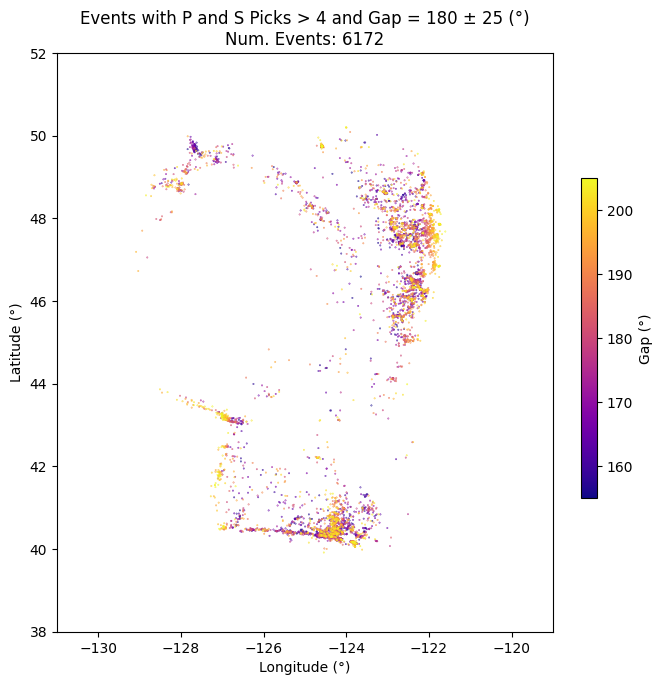

In [166]:
plt.figure(figsize=(8, 8))
tol_deg = 25
# Filter and sort the data
_df = df[(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('gap', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['gap'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Gap (°)')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and Gap=180+/-30 (°)

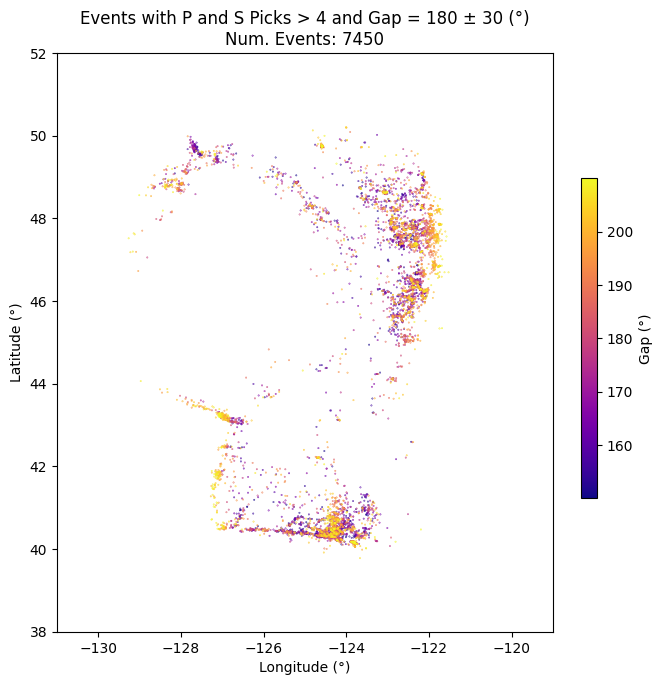

In [167]:
plt.figure(figsize=(8, 8))
tol_deg = 30
# Filter and sort the data
_df = df[(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('gap', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['gap'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Gap (°)')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### P and S Picks > 4 and Gap=180+/-40 (°)

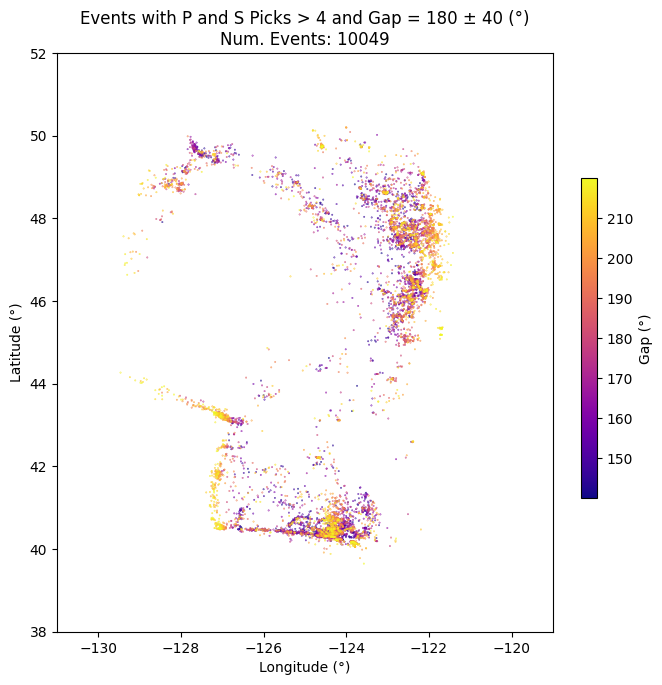

In [168]:
plt.figure(figsize=(8, 8))
tol_deg = 40
# Filter and sort the data
_df = df[(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('gap', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['gap'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Gap (°)')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

### Non-Dimensional Distance Equation

The non-dimensional distance is defined as:

$$
\text{NonDimDist} = \sqrt{\left(\frac{\Delta t}{120}\right)^2 + \left(\frac{\Delta x}{25}\right)^2}
$$

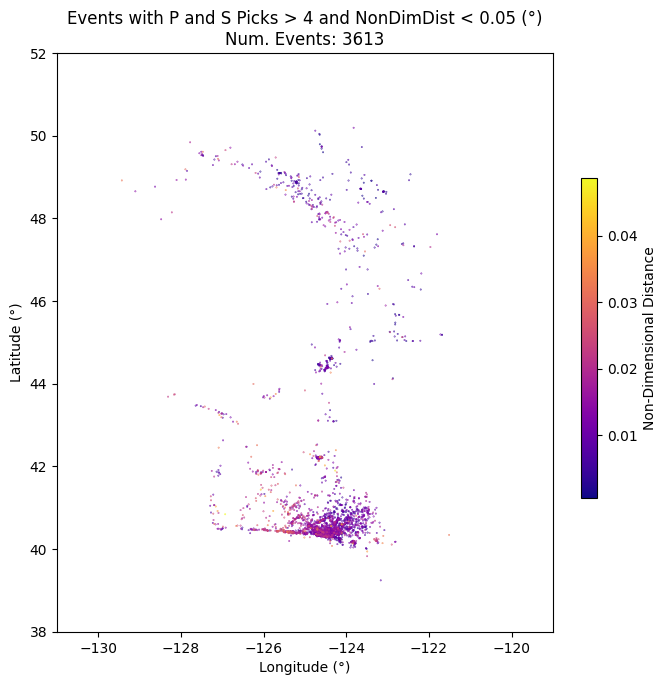

In [173]:
plt.figure(figsize=(8, 8))
tol_deg = 40
# Filter and sort the data
_df = df[(df['NonDimDist'] < 0.05)].sort_values('NonDimDist', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['NonDimDist'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='Non-Dimensional Distance')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and NonDimDist < 0.05 (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

### Combine the filters 

#### P and S Picks > 4, RMS < 1.5 and Gap = 180 ± 25 (°)

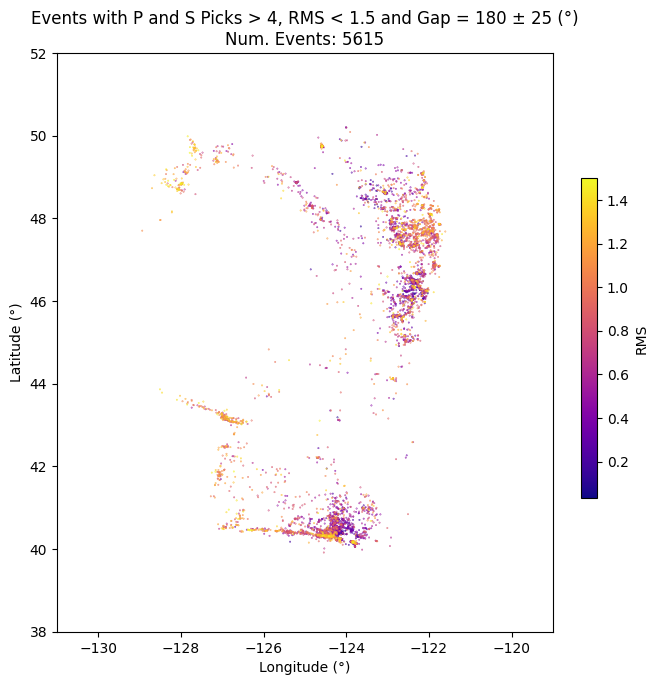

In [170]:
plt.figure(figsize=(8, 8))
tol_deg = 25
# Filter and sort the data
_df = df[(df.rms<1.5)&(abs(180-df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=True)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4, RMS < 1.5 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

#### Zoom into offshore WA

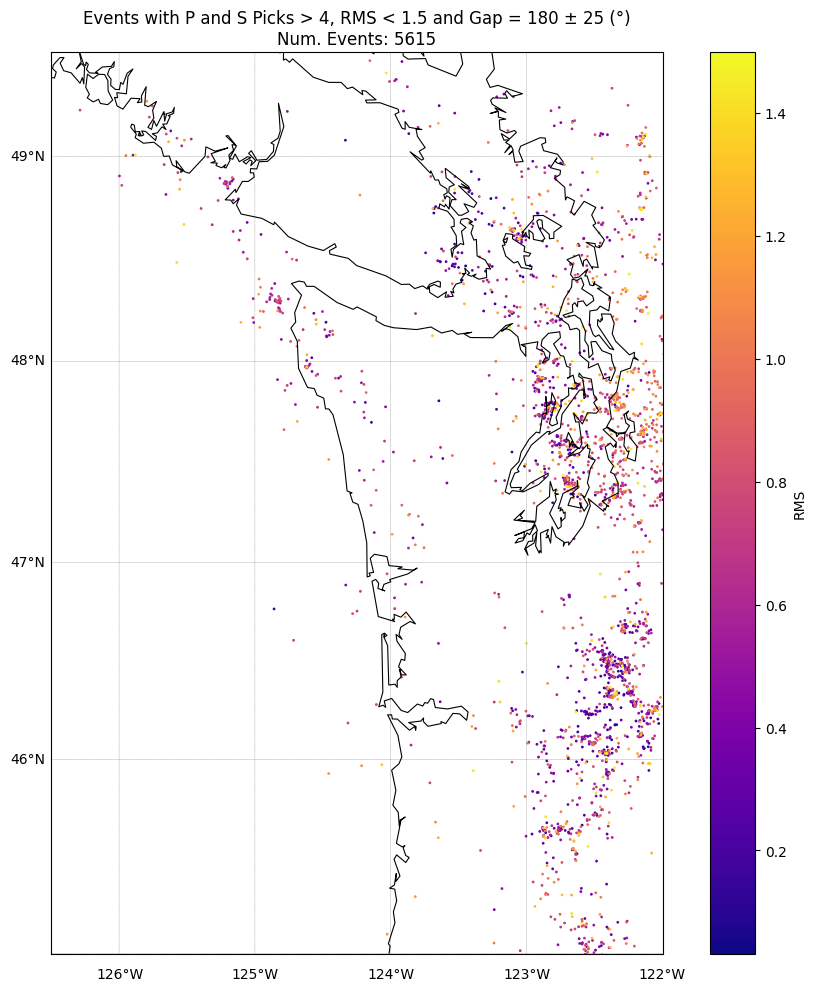

In [172]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Filter and sort the data
tol_deg = 25
_df = df[(df.rms < 1.5) & (abs(180 - df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=True)

# Set up figure
plt.figure(figsize=(10, 10))

# Create map
m = Basemap(
    projection='merc',
    llcrnrlon=-126.5, urcrnrlon=-122,
    llcrnrlat=45, urcrnrlat=49.5,
    resolution='i'
)

# Draw coastlines
m.drawcoastlines(color='black', linewidth=0.8)

# Add lat/lon grid lines with labels
parallels = range(45, 50, 1)
meridians = range(-127, -121, 1)

m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.2, fontsize=10)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.2, fontsize=10)

# Convert coords and plot
x, y = m(_df['lon'].values, _df['lat'].values)
scatter = m.scatter(x, y, c=_df['rms'], cmap='plasma', s=1)

# Colorbar
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.85, 0.3, 0.03, 0.4])

# Title
plt.title(f'Events with P and S Picks > 4, RMS < 1.5 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')

plt.tight_layout()
plt.show()
